In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evaluation
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import tensorflow as tf 
import datapane as dp
import altair as alt

In [ ]:
def alt_forecasts(history, test, prediction, title='Prediction', ylabel='value', xlabel='time', ts=(500,20)):
    # plot forecasts against actual outcomes
    fill_nan = np.empty(len(history))
    fill_nan[:] = np.nan
    in_nan = np.empty(len(test))
    in_nan[:] = np.nan

    in_seq = np.concatenate((np.array(history), in_nan))
    tar_seq = np.concatenate((fill_nan, np.array(test.copy())))
    predicted_seq = np.concatenate((fill_nan, np.array(prediction.copy())))
    df = pd.DataFrame(np.array([in_seq, tar_seq, predicted_seq]).transpose(), columns=['input', 'target', 'prediction'])
    chart = alt.Chart(df).mark_point()

    
plot_list = []
for i in range(5):
    alt_forecasts(hist[:,i], test[:,i], fc[:,i], title=cols[i], ts=(500,20))

report = dp.Report(
    dp.Text('''## Dropdown using Datapane'''),
    dp.Select(blocks = plot_list)
)

In [2]:
def plot_forecasts(history, test, prediction, title='Prediction', ylabel='value', xlabel='time', ts=(500,20)):
    # plot forecasts against actual outcomes
    fill_nan = np.empty(len(history))
    fill_nan[:] = np.nan
    in_nan = np.empty(len(test))
    in_nan[:] = np.nan

    in_seq = np.concatenate((np.array(history), in_nan))
    tar_seq = np.concatenate((fill_nan, np.array(test.copy())))
    predicted_seq = np.concatenate((fill_nan, np.array(prediction.copy())))
    plt.plot(in_seq)
    plt.plot(tar_seq)
    plt.plot(predicted_seq)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend(['input_seq', 'target_seq', 'pre_seq'], loc='upper right')
    axes = plt.gca()
    fig_predict = plt.figure(figsize=ts)
    plt.show()

In [4]:
corr_group = {
    'P_SUM': #Var to Predict
        ['S_SUM', # Sum of apparent power S1, S2, S3
        'S_L3', # Apparent power S3 
        'S_L2', # Apparent Power S2
        'S_L1', # Apparent power S1
        'C_phi_L1', #Fund power CosPhi factor L1
        'C_phi_L2', #Fund power CosPhi factor L2
        'P_SUM', # Sum of powers P1, P2, P3
        'P_L1', # Real Power 1
        'P_L2', # Real Power 2
        'P_L3', # Real Power 3
        'Q_SUM', # SUm of fund reactive power
        'Q_L1', #Fundamental Reactive Power Q1
        'Q_L2', #Fundamental Reactive Power Q2
        'Q_L3', #Fundamental Reactive Power Q3
        'I_L1', # Current L1
        'I_L2', # Current L2
        'I_L3'], # Current L3
    'U_L1_N':
        ['U_L1_L2', # Voltage L1_l2
        'U_L3_L1', # Voltage L3_l1
        'U_L3_N', # Voltage L3_N
        'U_L2_L3', # Voltage L2_l3
        'U_L2_N', # Voltage L2_N
        'U_L1_N'], # VOltage L1_N 
    'I_SUM': 
        ['I_SUM'], # Current Sum 
    'F': 
        ['F'], # Measured Freq
    'RealE_SUM':
        ['RealEc_SUM', # Sum of Consumed Energy 
        'RealEc_L1', # Real Energy Consumed L1
        'RealEc_L2', # Real Energy Consumed L2
        'RealEc_L3', # Real Energy Consumed L3
        'RealE_SUM', # Sum of Real Energy 
        'RealE_L2', # Real Energy L2
        'RealE_L3', # Real Energy L3
        'RealE_L1', # Real Energy L1
        'AE_SUM', # Apparent Energy Sum
        'AE_L1', # Apparent Energy L1
        'AE_L2', # Apparent Energy L2
        'AE_L3', # Apparent Energy L3
        'ReacE_L1'], #Reactive Energy L1
    'C_phi_L3': 
        ['C_phi_L3'] #Fund power CosPhi factor L3
}

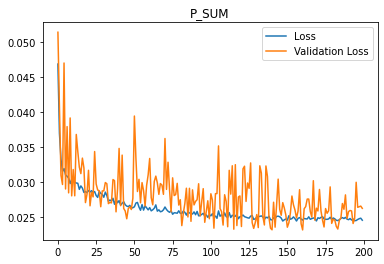

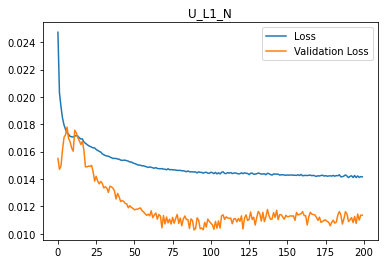

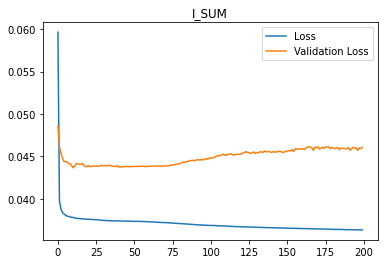

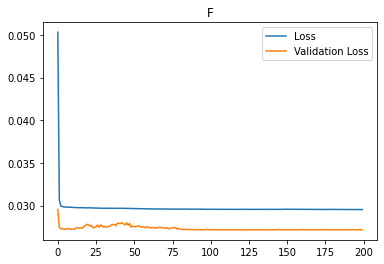

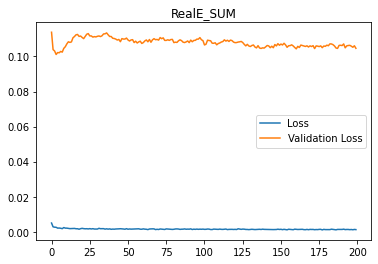

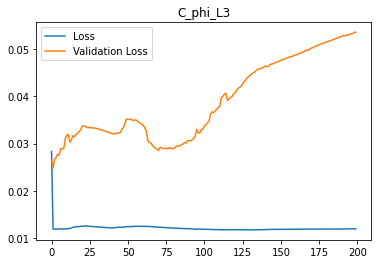

In [8]:
for k in corr_group:
    hist = pd.read_csv('results/Norm_LSTM_'+k+'_history.csv',index_col='Unnamed: 0')
    hist.plot(title=k)

In [9]:
df = pd.read_csv("data/mongo_data.csv", index_col='ts')
df = df.drop('Unnamed: 0', 1)
#Remove cols with the same value

def unique_cols(df):
    a = df.to_numpy() # df.values (pandas<0.24)
    return (a[0] == a).all(0)

df = df.loc[:,np.invert(unique_cols(df))]
print(df.shape)
df.tail()

C:\Users\pedro\AppData\Local\Temp\ipykernel_1832\468073868.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0', 1)


(1928755, 39)


,S_SUM,U_L1_L2,I_SUM,F,U_L3_L1,C_phi_L1,U_L3_N,RealEc_L1,RealEc_L2,RealEc_L3,...,S_L3,Q_L1,S_L2,U_L2_N,S_L1,U_L1_N,I_L1,RealEc_SUM,I_L2,I_L3
ts,,,,,,,,,,,,,,,,,,,,,
2022-03-16T11:46:25.931837314Z,144890.16,408.87,1.08,49.97,407.98,0.97,235.64,44933936,43492684,43453100,...,46857.12,10264.62,50062.00,236.46,47971.05,235.85,203.40,131879832,211.72,198.85
2022-03-16T11:46:27.213046140Z,143902.53,409.29,1.12,49.97,406.56,0.99,234.81,44933952,43492700,43453120,...,47984.26,7155.61,46749.76,236.46,49168.52,235.03,209.20,131879880,197.71,204.36
2022-03-16T11:46:28.499715032Z,143457.63,408.75,1.14,49.97,405.88,0.99,234.87,44933968,43492712,43453132,...,46998.51,7665.49,47098.83,236.24,49360.28,234.77,210.25,131879920,199.37,200.11
2022-03-16T11:46:29.814130324Z,144825.58,408.98,1.09,49.97,408.18,0.97,235.72,44933988,43492732,43453148,...,46598.08,10189.86,49460.64,236.48,48766.86,235.93,206.70,131879976,209.15,197.69
2022-03-16T11:46:31.116579462Z,143771.91,409.67,1.14,49.97,406.51,0.98,235.17,44934000,43492744,43453164,...,47383.55,7984.87,47779.66,236.53,48608.71,234.99,206.85,131880016,202.00,201.49


In [10]:
# Average window
df_2 = df.groupby(np.arange(len(df))//15).mean()
print(df_2.shape)
df_2.head()

(128584, 39)


,S_SUM,U_L1_L2,I_SUM,F,U_L3_L1,C_phi_L1,U_L3_N,RealEc_L1,RealEc_L2,RealEc_L3,...,S_L3,Q_L1,S_L2,U_L2_N,S_L1,U_L1_N,I_L1,RealEc_SUM,I_L2,I_L3
0,146278.759333,412.942667,1.092667,50.024000,411.271333,0.984667,237.933333,2.587578e+07,2.517198e+07,2.503395e+07,...,47871.406000,7988.156000,48925.401333,238.490000,49481.953333,237.767333,208.122667,7.608182e+07,205.150667,201.218000
1,146580.752000,413.749333,1.091333,50.026667,412.120000,0.983333,238.438667,2.587929e+07,2.517546e+07,2.503734e+07,...,48232.370667,8024.718667,48929.587333,239.028000,49418.793333,238.224000,207.450667,7.609219e+07,204.700667,202.295333
2,146025.392000,410.249333,1.008000,50.028667,408.703333,0.985333,236.354667,2.587953e+07,2.517570e+07,2.503757e+07,...,47987.455333,7678.636000,48647.587333,237.024000,49390.351333,236.273333,209.040000,7.609290e+07,205.247333,203.033333
3,146491.404000,413.193333,1.028000,50.023333,411.313333,0.985333,237.910667,2.587977e+07,2.517593e+07,2.503780e+07,...,47940.390000,8018.503333,48652.387333,238.720667,49898.626000,237.723333,209.912667,7.609361e+07,203.810000,201.510000
4,146481.554667,415.826000,1.080667,50.026667,414.226000,0.984000,239.593333,2.588001e+07,2.517617e+07,2.503804e+07,...,48066.726000,8174.567333,48771.405333,240.241333,49643.423333,239.338667,207.430000,7.609433e+07,203.014667,200.614667


In [11]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df_2)
scaled_df = pd.DataFrame(d, columns=df_2.columns, index=df_2.index)
scaled_df.head()

,S_SUM,U_L1_L2,I_SUM,F,U_L3_L1,C_phi_L1,U_L3_N,RealEc_L1,RealEc_L2,RealEc_L3,...,S_L3,Q_L1,S_L2,U_L2_N,S_L1,U_L1_N,I_L1,RealEc_SUM,I_L2,I_L3
0,0.946714,0.622212,0.779687,0.658824,0.596937,0.990610,0.629217,0.000000,0.000000,0.000000,...,0.928538,0.718603,0.953891,0.606313,0.935797,0.609943,0.941811,0.000000,0.941519,0.916990
1,0.948669,0.647577,0.778646,0.670588,0.624396,0.989269,0.656565,0.000184,0.000190,0.000184,...,0.935542,0.721885,0.953973,0.635695,0.934602,0.635568,0.938770,0.000186,0.939454,0.921902
2,0.945074,0.537523,0.713542,0.679412,0.513848,0.991281,0.543782,0.000197,0.000203,0.000197,...,0.930790,0.690818,0.948474,0.526251,0.934064,0.526111,0.945962,0.000199,0.941962,0.925266
3,0.948090,0.630094,0.729167,0.655882,0.598296,0.991281,0.627990,0.000209,0.000216,0.000209,...,0.929876,0.721327,0.948568,0.618911,0.943677,0.607474,0.949911,0.000211,0.935366,0.918321
4,0.948026,0.712875,0.770312,0.670588,0.692537,0.989940,0.719053,0.000222,0.000229,0.000222,...,0.932328,0.735337,0.950889,0.701959,0.938850,0.698115,0.938677,0.000224,0.931716,0.914239


38575 12857 12857


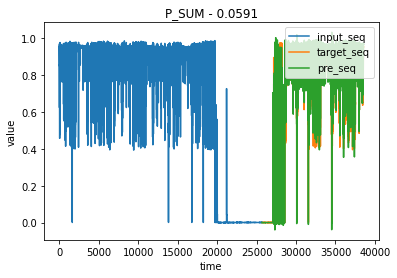

<Figure size 36000x1440 with 0 Axes>

38575 12857 12857


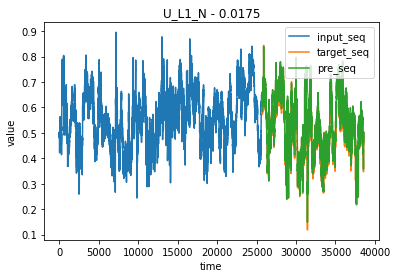

<Figure size 36000x1440 with 0 Axes>

38575 12857 12857


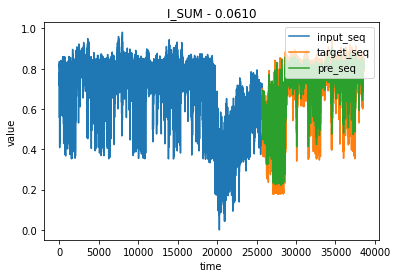

<Figure size 36000x1440 with 0 Axes>

38575 12857 12857


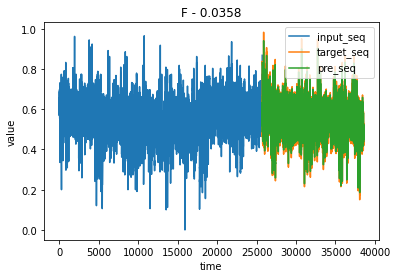

<Figure size 36000x1440 with 0 Axes>

38575 12857 12857


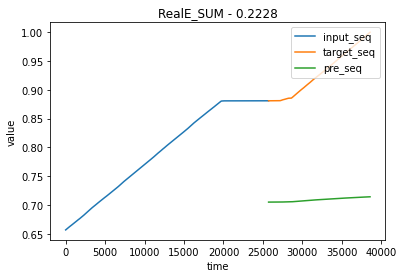

<Figure size 36000x1440 with 0 Axes>

38575 12857 12857


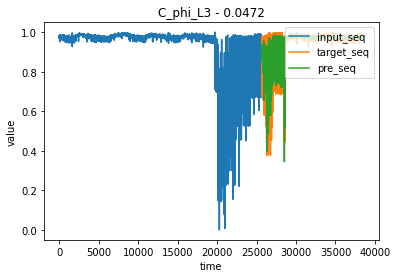

<Figure size 36000x1440 with 0 Axes>

In [28]:
from sklearn.metrics import mean_squared_error

vals = scaled_df.shape[0]
history_window = int(0.3*vals)

for k in corr_group:
    fc = pd.read_csv('results/Norm_LSTM'+k+'predict.csv',index_col='Unnamed: 0').values[:,0]
    prediction_window = len(fc)
    print(history_window, prediction_window, len(fc))
    hist = scaled_df[k].values[-history_window:-prediction_window]
    test = scaled_df[k].values[-prediction_window:]
    rmse = np.sqrt(mean_squared_error(test, fc))
    plot_forecasts(hist, test, fc, title=f"{k} - {rmse:.4f}", ts=(500,20))


In [26]:
values = scaled_df.values
history_window = int(0.3*24*60*60)
prediction_window = int(0.1*24*60*60)
hist = values[-history_window:-prediction_window,:]
test = values[-prediction_window:,]
fc = pred.values
cols = scaled_df.columns

for i in range(len(cols)):
    plot_forecasts(hist[:,i], test[:,i], fc[:,i], title=cols[i], ts=(500,20))

NameError: name 'pred' is not defined

In [ ]:
pred = pd.read_csv("results/PCA_LSTM40_Drop_60secs_MSE_prediction.csv", index_col='Unnamed: 0').transpose()
fc = pred.values
for i in range(len(cols)):
    rmse = np.sqrt(mean_squared_error(test[:,i], fc[:,i]))
    print("%.4f" % rmse)
